GitHub: https://github.com/JunYing0306/DATS-6103-Individual-Project-3-Jun-Ying

Zenodo: https://zenodo.org/record/2672927#.XNHd05hKhPY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import warnings
import math
import plotly
import plotly.plotly as py
import numpy as np
import copy
warnings.filterwarnings('ignore')
#pd.set_option('Display.float_format', lambda x: '%.2f'% x)

In [2]:
# data came from kaggle.com
zipfile.ZipFile('videogamesales.zip').extractall('.')

In [3]:
#open file
vgsales = pd.read_csv('vgsales.csv', index_col = 0)
#add a column to count the number of games
vgsales['Number of Games'] = 1

In [4]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 11 columns):
Name               16598 non-null object
Platform           16598 non-null object
Year               16327 non-null float64
Genre              16598 non-null object
Publisher          16540 non-null object
NA_Sales           16598 non-null float64
EU_Sales           16598 non-null float64
JP_Sales           16598 non-null float64
Other_Sales        16598 non-null float64
Global_Sales       16598 non-null float64
Number of Games    16598 non-null int64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [5]:
#preview
vgsales.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Number of Games
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,1
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,1
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,1
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,1
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,1


In [6]:
#group by Year, set Year to an integer， and set_index Year
year_total = vgsales.groupby('Year').sum()
year_total = year_total.reset_index(drop=False)
year_total['Year'] = year_total['Year'].apply(int)
year_total = year_total.set_index('Year')
year_total.drop([2016,2017,2020], inplace=True)

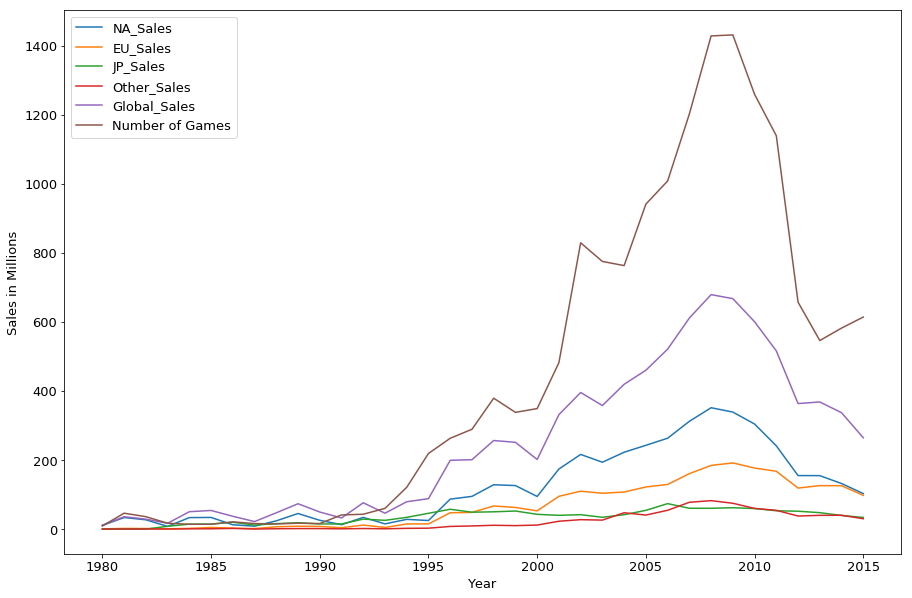

In [7]:
#draw a line chart
year_total_line = year_total.plot(figsize=(15,10), fontsize=13)
plt.legend(loc='best', fontsize=13)
year_total_line.set_xlabel('Year', fontsize=13)
year_total_line.set_ylabel('Sales in Millions', fontsize=13)
plt.show()

In [8]:
#group by platform
Platform_total = vgsales.groupby('Platform').sum()
del Platform_total['Year'] #ignore the years
#sort by sales
Platform_sales_sort = Platform_total.sort_values(by='Global_Sales', ascending=False).head(10)
Platform_sales_sort

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Number of Games
Platform,,,,,,
PS2,583.84,339.29,139.20,193.44,1255.64,2161
X360,601.05,280.58,12.43,85.54,979.96,1265
PS3,392.26,343.71,79.99,141.93,957.84,1329
Wii,507.71,268.38,69.35,80.61,926.71,1325
DS,390.71,194.65,175.57,60.53,822.49,2163
PS,336.51,213.60,139.82,40.91,730.66,1196
GBA,187.54,75.25,47.33,7.73,318.50,822
PSP,108.99,68.25,76.79,42.19,296.28,1213
PS4,96.80,123.70,14.30,43.36,278.10,336


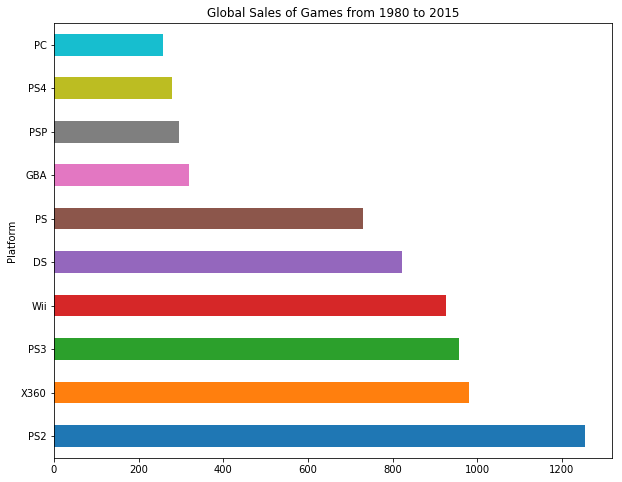

In [9]:
#draw a bar chart
pd.Series(Platform_sales_sort['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of Games from 1980 to 2015') 
plt.show()

In [10]:
#sort by number
Platform_games_sort = Platform_total.sort_values(by='Number of Games', ascending=False).head(10)
Platform_games_sort

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Number of Games
Platform,,,,,,
DS,390.71,194.65,175.57,60.53,822.49,2163
PS2,583.84,339.29,139.20,193.44,1255.64,2161
PS3,392.26,343.71,79.99,141.93,957.84,1329
Wii,507.71,268.38,69.35,80.61,926.71,1325
X360,601.05,280.58,12.43,85.54,979.96,1265
PSP,108.99,68.25,76.79,42.19,296.28,1213
PS,336.51,213.60,139.82,40.91,730.66,1196
PC,93.28,139.68,0.17,24.86,258.82,960
XB,186.69,60.95,1.38,8.72,258.26,824


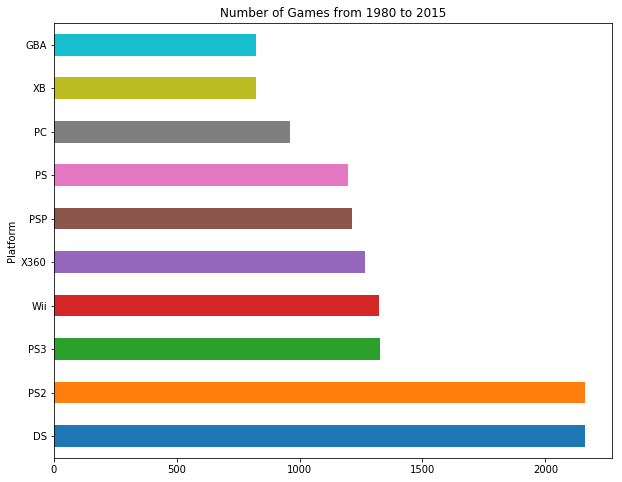

In [11]:
#draw a bar chart
pd.Series(Platform_games_sort['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games from 1980 to 2015') 
plt.show()

In [12]:
#group by Genre
Genre_total = vgsales.groupby('Genre').sum()
del Genre_total['Year'] #ignore the years
#sort by sales
Genre_sales_sort = Genre_total.sort_values(by='Global_Sales', ascending=False)
Genre_sales_sort

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Number of Games
Genre,,,,,,
Action,877.83,525.00,159.95,187.38,1751.18,3316
Sports,683.35,376.85,135.37,134.97,1330.93,2346
Shooter,582.60,313.27,38.28,102.69,1037.37,1310
Role-Playing,327.28,188.06,352.31,59.61,927.37,1488
Platform,447.05,201.63,130.77,51.59,831.37,886
Misc,410.24,215.98,107.76,75.32,809.96,1739
Racing,359.42,238.39,56.69,77.27,732.04,1249
Fighting,223.59,101.32,87.35,36.68,448.91,848
Simulation,183.31,113.38,63.70,31.52,392.20,867


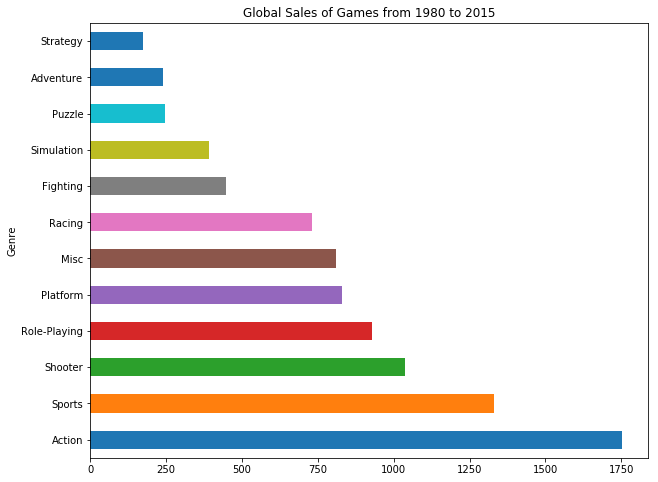

In [13]:
#draw a bar chart
pd.Series(Genre_sales_sort['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of Games from 1980 to 2015') 
plt.show()

In [14]:
#sort by number
Genre_games_sort = Genre_total.sort_values(by='Number of Games', ascending=False)
Genre_games_sort

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Number of Games
Genre,,,,,,
Action,877.83,525.00,159.95,187.38,1751.18,3316
Sports,683.35,376.85,135.37,134.97,1330.93,2346
Misc,410.24,215.98,107.76,75.32,809.96,1739
Role-Playing,327.28,188.06,352.31,59.61,927.37,1488
Shooter,582.60,313.27,38.28,102.69,1037.37,1310
Adventure,105.80,64.13,52.07,16.81,239.04,1286
Racing,359.42,238.39,56.69,77.27,732.04,1249
Platform,447.05,201.63,130.77,51.59,831.37,886
Simulation,183.31,113.38,63.70,31.52,392.20,867


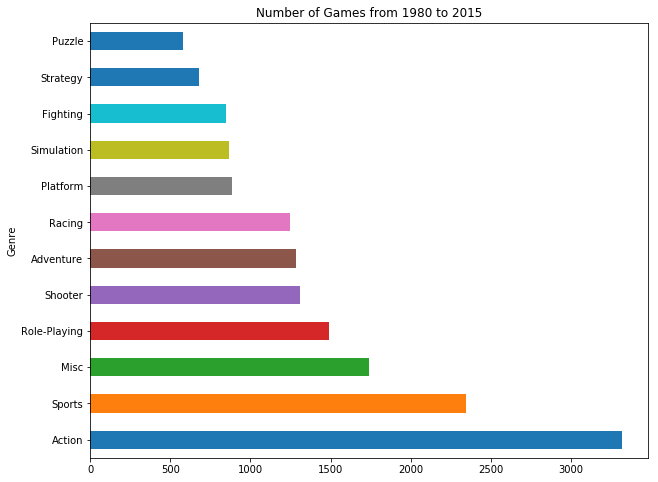

In [15]:
#draw a bar chart
pd.Series(Genre_games_sort['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games from 1980 to 2015') 
plt.show()

In [16]:
#group by Publisher
Publisher_total = vgsales.groupby('Publisher').sum()
del Publisher_total['Year'] #ignore the years
#sort by sales
Publisher_sales_sort = Publisher_total.sort_values(by='Global_Sales', ascending=False).head(10)
Publisher_sales_sort

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Number of Games
Publisher,,,,,,
Nintendo,816.87,418.74,455.42,95.33,1786.56,703
Electronic Arts,595.07,371.27,14.04,129.77,1110.32,1351
Activision,429.70,215.53,6.54,75.34,727.46,975
Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50,683
Ubisoft,253.43,163.32,7.50,50.26,474.72,921
Take-Two Interactive,220.49,118.14,5.83,55.24,399.54,413
THQ,208.77,94.73,5.01,32.14,340.77,715
Konami Digital Entertainment,92.16,69.69,91.30,30.31,283.64,832
Sega,109.40,82.00,57.03,24.52,272.99,639


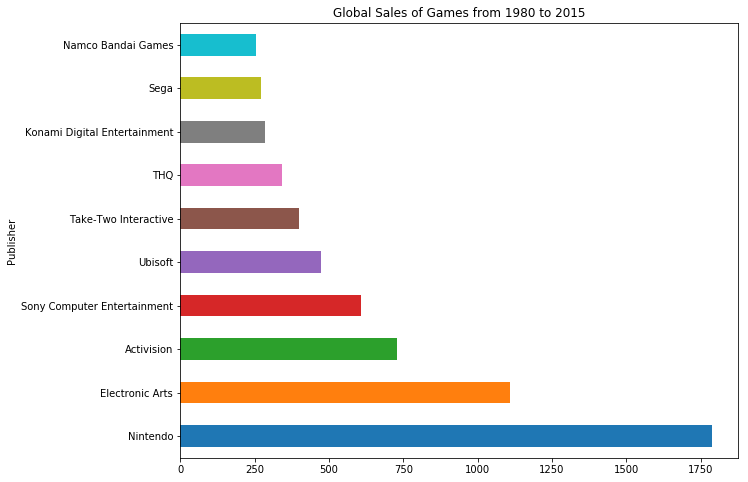

In [17]:
#draw a bar chart
pd.Series(Publisher_sales_sort['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of Games from 1980 to 2015') 
plt.show()

In [18]:
#sort by number
Publisher_games_sort = Publisher_total.sort_values(by='Number of Games', ascending=False).head(10)
Publisher_games_sort

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Number of Games
Publisher,,,,,,
Electronic Arts,595.07,371.27,14.04,129.77,1110.32,1351
Activision,429.70,215.53,6.54,75.34,727.46,975
Namco Bandai Games,69.52,42.63,127.07,14.69,254.09,932
Ubisoft,253.43,163.32,7.50,50.26,474.72,921
Konami Digital Entertainment,92.16,69.69,91.30,30.31,283.64,832
THQ,208.77,94.73,5.01,32.14,340.77,715
Nintendo,816.87,418.74,455.42,95.33,1786.56,703
Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50,683
Sega,109.40,82.00,57.03,24.52,272.99,639


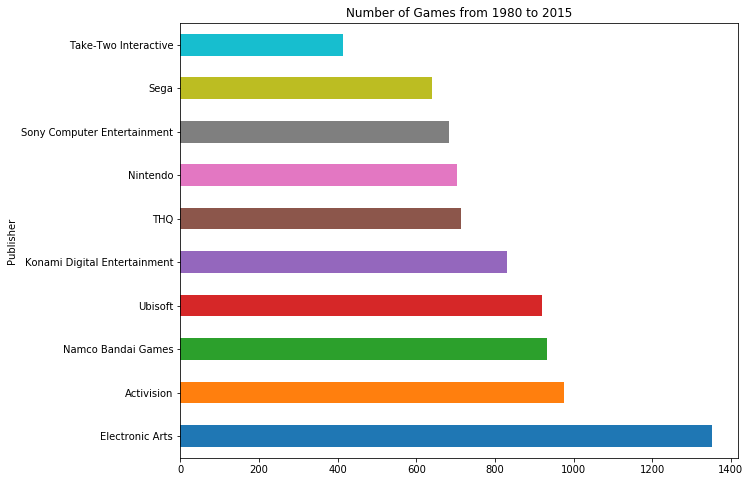

In [19]:
#draw a bar chart
pd.Series(Publisher_games_sort['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games from 1980 to 2015') 
plt.show()

In [20]:
#select years from 2006 to 2015
sales06_15 = vgsales[vgsales.Year >= 2006]

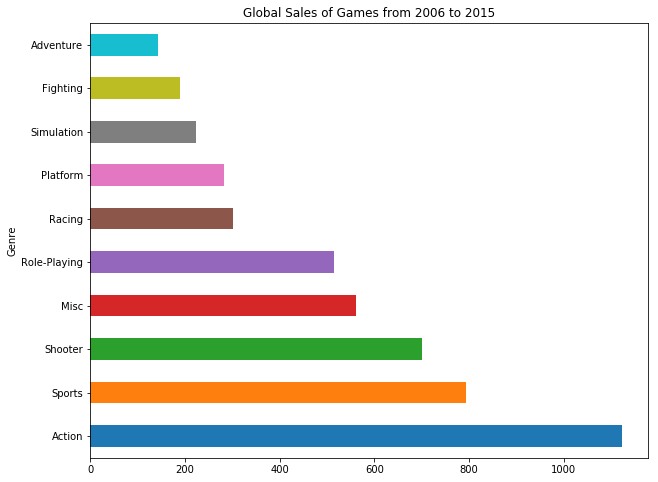

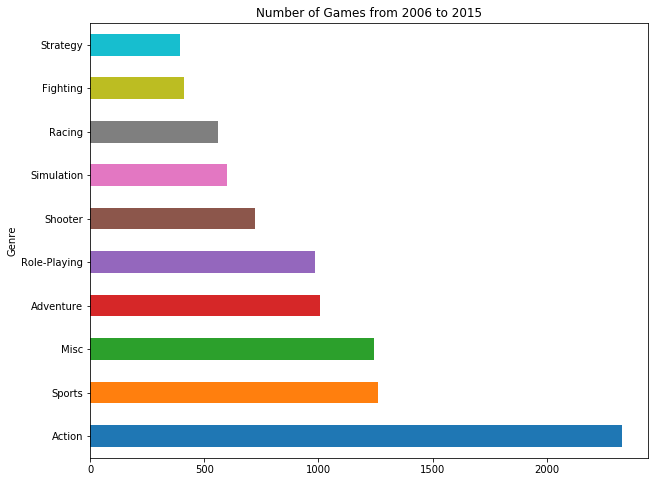

In [21]:
#draw a bar chart to see the global sales and number of games in these 10 years
Genre_06_15 = sales06_15.groupby('Genre').sum()
del Genre_06_15['Year']
Genre_sales_06_15 = Genre_06_15.sort_values(by='Global_Sales', ascending=False).head(10)
pd.Series(Genre_sales_06_15['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of Games from 2006 to 2015') 
plt.show()
Genre_games_06_15 = Genre_06_15.sort_values(by='Number of Games', ascending=False).head(10)
pd.Series(Genre_games_06_15['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games from 2006 to 2015') 
plt.show()

In [22]:
#create data frame of each year
vgsale_2006 = vgsales[vgsales['Year'].isin([2006])]
vgsale_2007 = vgsales[vgsales['Year'].isin([2007])]
vgsale_2008 = vgsales[vgsales['Year'].isin([2008])]
vgsale_2009 = vgsales[vgsales['Year'].isin([2009])]
vgsale_2010 = vgsales[vgsales['Year'].isin([2010])]
vgsale_2011 = vgsales[vgsales['Year'].isin([2011])]
vgsale_2012 = vgsales[vgsales['Year'].isin([2012])]
vgsale_2013 = vgsales[vgsales['Year'].isin([2013])]
vgsale_2014 = vgsales[vgsales['Year'].isin([2014])]
vgsale_2015 = vgsales[vgsales['Year'].isin([2015])]
#create a list for easy to use
list_year = [vgsale_2006,vgsale_2007,vgsale_2008,vgsale_2009,vgsale_2010,vgsale_2011,vgsale_2012,vgsale_2013,vgsale_2014,vgsale_2015]

In [23]:
#turn years into integer
for i in list_year:
    i['Year'] = i['Year'].apply(int)

In [24]:
#create a list for easy to use
year06_15 = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
Genre_list = sales06_15['Genre'].unique().tolist()
Genre_list

['Sports',
 'Racing',
 'Platform',
 'Misc',
 'Action',
 'Role-Playing',
 'Shooter',
 'Fighting',
 'Simulation',
 'Adventure',
 'Puzzle',
 'Strategy']

In [25]:
#select each genre from each year
Sports_2006 = vgsale_2006.loc[vgsale_2006['Genre'] == 'Sports']
Sports_2007 = vgsale_2007.loc[vgsale_2007['Genre'] == 'Sports']
Sports_2008 = vgsale_2008.loc[vgsale_2008['Genre'] == 'Sports']
Sports_2009 = vgsale_2009.loc[vgsale_2009['Genre'] == 'Sports']
Sports_2010 = vgsale_2010.loc[vgsale_2010['Genre'] == 'Sports']
Sports_2011 = vgsale_2011.loc[vgsale_2011['Genre'] == 'Sports']
Sports_2012 = vgsale_2012.loc[vgsale_2012['Genre'] == 'Sports']
Sports_2013 = vgsale_2013.loc[vgsale_2013['Genre'] == 'Sports']
Sports_2014 = vgsale_2014.loc[vgsale_2014['Genre'] == 'Sports']
Sports_2015 = vgsale_2015.loc[vgsale_2015['Genre'] == 'Sports']
#create a list for easy to use
list_Sports = [Sports_2006,Sports_2007,Sports_2008,Sports_2009,Sports_2010,Sports_2011,Sports_2012,Sports_2013,Sports_2014,Sports_2015]

In [26]:
#combine the data frame of each genre from each year
Sports = pd.DataFrame()
for a in list_Sports:
    i = copy.deepcopy(a)
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum())) #sum the whole year sales
    Sports = pd.concat([Sports,i],axis=0)
Sports = Sports.loc['sum',:] #select the sums
Sports.index = year06_15 #set index by years

In [27]:
Racing_2006 = vgsale_2006.loc[vgsale_2006['Genre'] == 'Racing']
Racing_2007 = vgsale_2007.loc[vgsale_2007['Genre'] == 'Racing']
Racing_2008 = vgsale_2008.loc[vgsale_2008['Genre'] == 'Racing']
Racing_2009 = vgsale_2009.loc[vgsale_2009['Genre'] == 'Racing']
Racing_2010 = vgsale_2010.loc[vgsale_2010['Genre'] == 'Racing']
Racing_2011 = vgsale_2011.loc[vgsale_2011['Genre'] == 'Racing']
Racing_2012 = vgsale_2012.loc[vgsale_2012['Genre'] == 'Racing']
Racing_2013 = vgsale_2013.loc[vgsale_2013['Genre'] == 'Racing']
Racing_2014 = vgsale_2014.loc[vgsale_2014['Genre'] == 'Racing']
Racing_2015 = vgsale_2015.loc[vgsale_2015['Genre'] == 'Racing']
list_Racing = [Racing_2006,Racing_2007,Racing_2008,Racing_2009,Racing_2010,Racing_2011,Racing_2012,Racing_2013,Racing_2014,Racing_2015]

In [28]:
Racing = pd.DataFrame()
for a in list_Racing:
    i = copy.deepcopy(a)
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Racing = pd.concat([Racing,i],axis=0)
Racing = Racing.loc['sum',:]
Racing.index = year06_15

In [29]:
Platform_2006 = vgsale_2006.loc[vgsale_2006['Genre'] == 'Platform']
Platform_2007 = vgsale_2007.loc[vgsale_2007['Genre'] == 'Platform']
Platform_2008 = vgsale_2008.loc[vgsale_2008['Genre'] == 'Platform']
Platform_2009 = vgsale_2009.loc[vgsale_2009['Genre'] == 'Platform']
Platform_2010 = vgsale_2010.loc[vgsale_2010['Genre'] == 'Platform']
Platform_2011 = vgsale_2011.loc[vgsale_2011['Genre'] == 'Platform']
Platform_2012 = vgsale_2012.loc[vgsale_2012['Genre'] == 'Platform']
Platform_2013 = vgsale_2013.loc[vgsale_2013['Genre'] == 'Platform']
Platform_2014 = vgsale_2014.loc[vgsale_2014['Genre'] == 'Platform']
Platform_2015 = vgsale_2015.loc[vgsale_2015['Genre'] == 'Platform']
list_Platform = [Platform_2006,Platform_2007,Platform_2008,Platform_2009,Platform_2010,Platform_2011,Platform_2012,Platform_2013,Platform_2014,Platform_2015]

In [30]:
Platform = pd.DataFrame()
for a in list_Platform:
    i = copy.deepcopy(a)
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Platform = pd.concat([Platform,i],axis=0)
Platform = Platform.loc['sum',:]
Platform.index = year06_15

In [31]:
Misc_2006 = vgsale_2006.loc[vgsale_2006['Genre'] == 'Misc']
Misc_2007 = vgsale_2007.loc[vgsale_2007['Genre'] == 'Misc']
Misc_2008 = vgsale_2008.loc[vgsale_2008['Genre'] == 'Misc']
Misc_2009 = vgsale_2009.loc[vgsale_2009['Genre'] == 'Misc']
Misc_2010 = vgsale_2010.loc[vgsale_2010['Genre'] == 'Misc']
Misc_2011 = vgsale_2011.loc[vgsale_2011['Genre'] == 'Misc']
Misc_2012 = vgsale_2012.loc[vgsale_2012['Genre'] == 'Misc']
Misc_2013 = vgsale_2013.loc[vgsale_2013['Genre'] == 'Misc']
Misc_2014 = vgsale_2014.loc[vgsale_2014['Genre'] == 'Misc']
Misc_2015 = vgsale_2015.loc[vgsale_2015['Genre'] == 'Misc']
list_Misc = [Misc_2006,Misc_2007,Misc_2008,Misc_2009,Misc_2010,Misc_2011,Misc_2012,Misc_2013,Misc_2014,Misc_2015]

In [32]:
Misc = pd.DataFrame()
for a in list_Misc:
    i = copy.deepcopy(a)
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Misc = pd.concat([Misc,i],axis=0)
Misc = Misc.loc['sum',:]
Misc.index = year06_15

In [33]:
Action_2006 = vgsale_2006.loc[vgsale_2006['Genre'] == 'Action']
Action_2007 = vgsale_2007.loc[vgsale_2007['Genre'] == 'Action']
Action_2008 = vgsale_2008.loc[vgsale_2008['Genre'] == 'Action']
Action_2009 = vgsale_2009.loc[vgsale_2009['Genre'] == 'Action']
Action_2010 = vgsale_2010.loc[vgsale_2010['Genre'] == 'Action']
Action_2011 = vgsale_2011.loc[vgsale_2011['Genre'] == 'Action']
Action_2012 = vgsale_2012.loc[vgsale_2012['Genre'] == 'Action']
Action_2013 = vgsale_2013.loc[vgsale_2013['Genre'] == 'Action']
Action_2014 = vgsale_2014.loc[vgsale_2014['Genre'] == 'Action']
Action_2015 = vgsale_2015.loc[vgsale_2015['Genre'] == 'Action']
list_Action = [Action_2006,Action_2007,Action_2008,Action_2009,Action_2010,Action_2011,Action_2012,Action_2013,Action_2014,Action_2015]

In [34]:
Action = pd.DataFrame()
for a in list_Action:
    i = copy.deepcopy(a)
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Action = pd.concat([Action,i],axis=0)
Action = Action.loc['sum',:]
Action.index = year06_15

In [35]:
RolePlaying_2006 = vgsale_2006.loc[vgsale_2006['Genre'] == 'Role-Playing']
RolePlaying_2007 = vgsale_2007.loc[vgsale_2007['Genre'] == 'Role-Playing']
RolePlaying_2008 = vgsale_2008.loc[vgsale_2008['Genre'] == 'Role-Playing']
RolePlaying_2009 = vgsale_2009.loc[vgsale_2009['Genre'] == 'Role-Playing']
RolePlaying_2010 = vgsale_2010.loc[vgsale_2010['Genre'] == 'Role-Playing']
RolePlaying_2011 = vgsale_2011.loc[vgsale_2011['Genre'] == 'Role-Playing']
RolePlaying_2012 = vgsale_2012.loc[vgsale_2012['Genre'] == 'Role-Playing']
RolePlaying_2013 = vgsale_2013.loc[vgsale_2013['Genre'] == 'Role-Playing']
RolePlaying_2014 = vgsale_2014.loc[vgsale_2014['Genre'] == 'Role-Playing']
RolePlaying_2015 = vgsale_2015.loc[vgsale_2015['Genre'] == 'Role-Playing']
list_RolePlaying = [RolePlaying_2006,RolePlaying_2007,RolePlaying_2008,RolePlaying_2009,RolePlaying_2010,RolePlaying_2011,RolePlaying_2012,RolePlaying_2013,RolePlaying_2014,RolePlaying_2015]

In [36]:
RolePlaying = pd.DataFrame()
for a in list_RolePlaying:
    i = copy.deepcopy(a)
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    RolePlaying = pd.concat([RolePlaying,i],axis=0)
RolePlaying = RolePlaying.loc['sum',:]
RolePlaying.index = year06_15

In [37]:
Shooter_2006 = vgsale_2006.loc[vgsale_2006['Genre'] == 'Shooter']
Shooter_2007 = vgsale_2007.loc[vgsale_2007['Genre'] == 'Shooter']
Shooter_2008 = vgsale_2008.loc[vgsale_2008['Genre'] == 'Shooter']
Shooter_2009 = vgsale_2009.loc[vgsale_2009['Genre'] == 'Shooter']
Shooter_2010 = vgsale_2010.loc[vgsale_2010['Genre'] == 'Shooter']
Shooter_2011 = vgsale_2011.loc[vgsale_2011['Genre'] == 'Shooter']
Shooter_2012 = vgsale_2012.loc[vgsale_2012['Genre'] == 'Shooter']
Shooter_2013 = vgsale_2013.loc[vgsale_2013['Genre'] == 'Shooter']
Shooter_2014 = vgsale_2014.loc[vgsale_2014['Genre'] == 'Shooter']
Shooter_2015 = vgsale_2015.loc[vgsale_2015['Genre'] == 'Shooter']
list_Shooter = [Shooter_2006,Shooter_2007,Shooter_2008,Shooter_2009,Shooter_2010,Shooter_2011,Shooter_2012,Shooter_2013,Shooter_2014,Shooter_2015]

In [38]:
Shooter = pd.DataFrame()
for a in list_Shooter:
    i = copy.deepcopy(a)
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Shooter = pd.concat([Shooter,i],axis=0)
Shooter = Shooter.loc['sum',:]
Shooter.index = year06_15

In [39]:
Fighting_2006 = vgsale_2006.loc[vgsale_2006['Genre'] == 'Fighting']
Fighting_2007 = vgsale_2007.loc[vgsale_2007['Genre'] == 'Fighting']
Fighting_2008 = vgsale_2008.loc[vgsale_2008['Genre'] == 'Fighting']
Fighting_2009 = vgsale_2009.loc[vgsale_2009['Genre'] == 'Fighting']
Fighting_2010 = vgsale_2010.loc[vgsale_2010['Genre'] == 'Fighting']
Fighting_2011 = vgsale_2011.loc[vgsale_2011['Genre'] == 'Fighting']
Fighting_2012 = vgsale_2012.loc[vgsale_2012['Genre'] == 'Fighting']
Fighting_2013 = vgsale_2013.loc[vgsale_2013['Genre'] == 'Fighting']
Fighting_2014 = vgsale_2014.loc[vgsale_2014['Genre'] == 'Fighting']
Fighting_2015 = vgsale_2015.loc[vgsale_2015['Genre'] == 'Fighting']
list_Fighting = [Fighting_2006,Fighting_2007,Fighting_2008,Fighting_2009,Fighting_2010,Fighting_2011,Fighting_2012,Fighting_2013,Fighting_2014,Fighting_2015]

In [40]:
Fighting = pd.DataFrame()
for a in list_Fighting:
    i = copy.deepcopy(a)
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Fighting = pd.concat([Fighting,i],axis=0)
Fighting = Fighting.loc['sum',:]
Fighting.index = year06_15

In [41]:
Simulation_2006 = vgsale_2006.loc[vgsale_2006['Genre'] == 'Simulation']
Simulation_2007 = vgsale_2007.loc[vgsale_2007['Genre'] == 'Simulation']
Simulation_2008 = vgsale_2008.loc[vgsale_2008['Genre'] == 'Simulation']
Simulation_2009 = vgsale_2009.loc[vgsale_2009['Genre'] == 'Simulation']
Simulation_2010 = vgsale_2010.loc[vgsale_2010['Genre'] == 'Simulation']
Simulation_2011 = vgsale_2011.loc[vgsale_2011['Genre'] == 'Simulation']
Simulation_2012 = vgsale_2012.loc[vgsale_2012['Genre'] == 'Simulation']
Simulation_2013 = vgsale_2013.loc[vgsale_2013['Genre'] == 'Simulation']
Simulation_2014 = vgsale_2014.loc[vgsale_2014['Genre'] == 'Simulation']
Simulation_2015 = vgsale_2015.loc[vgsale_2015['Genre'] == 'Simulation']
list_Simulation = [Simulation_2006,Simulation_2007,Simulation_2008,Simulation_2009,Simulation_2010,Simulation_2011,Simulation_2012,Simulation_2013,Simulation_2014,Simulation_2015]

In [42]:
Simulation = pd.DataFrame()
for a in list_Simulation:
    i = copy.deepcopy(a)
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Simulation = pd.concat([Simulation,i],axis=0)
Simulation = Simulation.loc['sum',:]
Simulation.index = year06_15

In [43]:
Adventure_2006 = vgsale_2006.loc[vgsale_2006['Genre'] == 'Adventure']
Adventure_2007 = vgsale_2007.loc[vgsale_2007['Genre'] == 'Adventure']
Adventure_2008 = vgsale_2008.loc[vgsale_2008['Genre'] == 'Adventure']
Adventure_2009 = vgsale_2009.loc[vgsale_2009['Genre'] == 'Adventure']
Adventure_2010 = vgsale_2010.loc[vgsale_2010['Genre'] == 'Adventure']
Adventure_2011 = vgsale_2011.loc[vgsale_2011['Genre'] == 'Adventure']
Adventure_2012 = vgsale_2012.loc[vgsale_2012['Genre'] == 'Adventure']
Adventure_2013 = vgsale_2013.loc[vgsale_2013['Genre'] == 'Adventure']
Adventure_2014 = vgsale_2014.loc[vgsale_2014['Genre'] == 'Adventure']
Adventure_2015 = vgsale_2015.loc[vgsale_2015['Genre'] == 'Adventure']
list_Adventure = [Adventure_2006,Adventure_2007,Adventure_2008,Adventure_2009,Adventure_2010,Adventure_2011,Adventure_2012,Adventure_2013,Adventure_2014,Adventure_2015]

In [44]:
Adventure = pd.DataFrame()
for a in list_Adventure:
    i = copy.deepcopy(a)
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Adventure = pd.concat([Adventure,i],axis=0)
Adventure = Adventure.loc['sum',:]
Adventure.index = year06_15

In [45]:
Puzzle_2006 = vgsale_2006.loc[vgsale_2006['Genre'] == 'Puzzle']
Puzzle_2007 = vgsale_2007.loc[vgsale_2007['Genre'] == 'Puzzle']
Puzzle_2008 = vgsale_2008.loc[vgsale_2008['Genre'] == 'Puzzle']
Puzzle_2009 = vgsale_2009.loc[vgsale_2009['Genre'] == 'Puzzle']
Puzzle_2010 = vgsale_2010.loc[vgsale_2010['Genre'] == 'Puzzle']
Puzzle_2011 = vgsale_2011.loc[vgsale_2011['Genre'] == 'Puzzle']
Puzzle_2012 = vgsale_2012.loc[vgsale_2012['Genre'] == 'Puzzle']
Puzzle_2013 = vgsale_2013.loc[vgsale_2013['Genre'] == 'Puzzle']
Puzzle_2014 = vgsale_2014.loc[vgsale_2014['Genre'] == 'Puzzle']
Puzzle_2015 = vgsale_2015.loc[vgsale_2015['Genre'] == 'Puzzle']
list_Puzzle = [Puzzle_2006,Puzzle_2007,Puzzle_2008,Puzzle_2009,Puzzle_2010,Puzzle_2011,Puzzle_2012,Puzzle_2013,Puzzle_2014,Puzzle_2015]

In [46]:
Puzzle = pd.DataFrame()
for a in list_Puzzle:
    i = copy.deepcopy(a)
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Puzzle = pd.concat([Puzzle,i],axis=0)
Puzzle = Puzzle.loc['sum',:]
Puzzle.index = year06_15

In [47]:
Strategy_2006 = vgsale_2006.loc[vgsale_2006['Genre'] == 'Strategy']
Strategy_2007 = vgsale_2007.loc[vgsale_2007['Genre'] == 'Strategy']
Strategy_2008 = vgsale_2008.loc[vgsale_2008['Genre'] == 'Strategy']
Strategy_2009 = vgsale_2009.loc[vgsale_2009['Genre'] == 'Strategy']
Strategy_2010 = vgsale_2010.loc[vgsale_2010['Genre'] == 'Strategy']
Strategy_2011 = vgsale_2011.loc[vgsale_2011['Genre'] == 'Strategy']
Strategy_2012 = vgsale_2012.loc[vgsale_2012['Genre'] == 'Strategy']
Strategy_2013 = vgsale_2013.loc[vgsale_2013['Genre'] == 'Strategy']
Strategy_2014 = vgsale_2014.loc[vgsale_2014['Genre'] == 'Strategy']
Strategy_2015 = vgsale_2015.loc[vgsale_2015['Genre'] == 'Strategy']
list_Strategy = [Strategy_2006,Strategy_2007,Strategy_2008,Strategy_2009,Strategy_2010,Strategy_2011,Strategy_2012,Strategy_2013,Strategy_2014,Strategy_2015]

In [48]:
Strategy = pd.DataFrame()
for a in list_Strategy:
    i = copy.deepcopy(a)
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Strategy = pd.concat([Strategy,i],axis=0)
Strategy = Strategy.loc['sum',:]
Strategy.index = year06_15

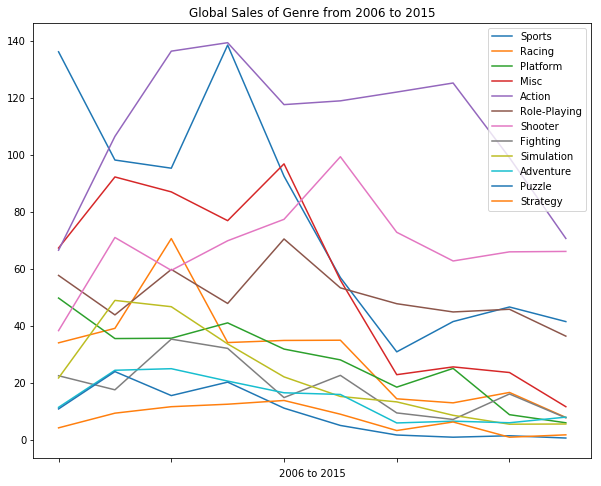

In [49]:
#create dataframe of Global Sales of Genre from 2006 to 2015
Genre_Global_Sales = pd.DataFrame({'Sports':Sports.loc[:,'Global_Sales'],
 'Racing':Racing.loc[:,'Global_Sales'],
 'Platform':Platform.loc[:,'Global_Sales'],
 'Misc':Misc.loc[:,'Global_Sales'],
 'Action':Action.loc[:,'Global_Sales'],
 'Role-Playing':RolePlaying.loc[:,'Global_Sales'],
 'Shooter':Shooter.loc[:,'Global_Sales'],
 'Fighting':Fighting.loc[:,'Global_Sales'],
 'Simulation':Simulation.loc[:,'Global_Sales'],
 'Adventure':Adventure.loc[:,'Global_Sales'],
 'Puzzle':Puzzle.loc[:,'Global_Sales'],
 'Strategy':Strategy.loc[:,'Global_Sales']})
#draw a line chart
Genre_Global_Sales.plot(kind='line', figsize=(10,8), title='Global Sales of Genre from 2006 to 2015')
plt.xlabel('2006 to 2015')
plt.show()

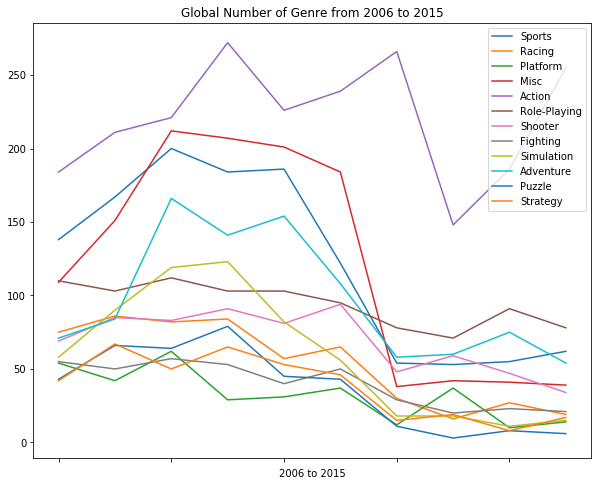

In [50]:
#create dataframe of Global Number of Genre from 2006 to 2015
Genre_Global_Games = pd.DataFrame({'Sports':Sports.loc[:,'Number of Games'],
 'Racing':Racing.loc[:,'Number of Games'],
 'Platform':Platform.loc[:,'Number of Games'],
 'Misc':Misc.loc[:,'Number of Games'],
 'Action':Action.loc[:,'Number of Games'],
 'Role-Playing':RolePlaying.loc[:,'Number of Games'],
 'Shooter':Shooter.loc[:,'Number of Games'],
 'Fighting':Fighting.loc[:,'Number of Games'],
 'Simulation':Simulation.loc[:,'Number of Games'],
 'Adventure':Adventure.loc[:,'Number of Games'],
 'Puzzle':Puzzle.loc[:,'Number of Games'],
 'Strategy':Strategy.loc[:,'Number of Games']})
#draw a line chart
Genre_Global_Games.plot(kind='line', figsize=(10,8), title='Global Number of Genre from 2006 to 2015')
plt.xlabel('2006 to 2015')
plt.show()

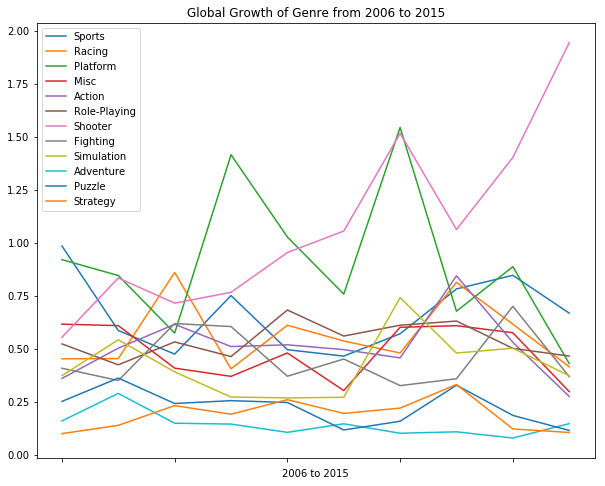

In [51]:
#create dataframe of Global Growth of Genre from 2006 to 2015
Genre_Growth= pd.DataFrame({'Sports':Sports.loc[:,'Global_Sales']/Sports.loc[:,'Number of Games'],
 'Racing':Racing.loc[:,'Global_Sales']/Racing.loc[:,'Number of Games'],
 'Platform':Platform.loc[:,'Global_Sales']/Platform.loc[:,'Number of Games'],
 'Misc':Misc.loc[:,'Global_Sales']/Misc.loc[:,'Number of Games'],
 'Action':Action.loc[:,'Global_Sales']/Action.loc[:,'Number of Games'],
 'Role-Playing':RolePlaying.loc[:,'Global_Sales']/RolePlaying.loc[:,'Number of Games'],
 'Shooter':Shooter.loc[:,'Global_Sales']/Shooter.loc[:,'Number of Games'],
 'Fighting':Fighting.loc[:,'Global_Sales']/Fighting.loc[:,'Number of Games'],
 'Simulation':Simulation.loc[:,'Global_Sales']/Simulation.loc[:,'Number of Games'],
 'Adventure':Adventure.loc[:,'Global_Sales']/Adventure.loc[:,'Number of Games'],
 'Puzzle':Puzzle.loc[:,'Global_Sales']/Puzzle.loc[:,'Number of Games'],
 'Strategy':Strategy.loc[:,'Global_Sales']/Strategy.loc[:,'Number of Games']})
#draw a line chart
Genre_Growth.plot(kind='line', figsize=(10,8), title='Global Growth of Genre from 2006 to 2015')
plt.xlabel('2006 to 2015')
plt.show()

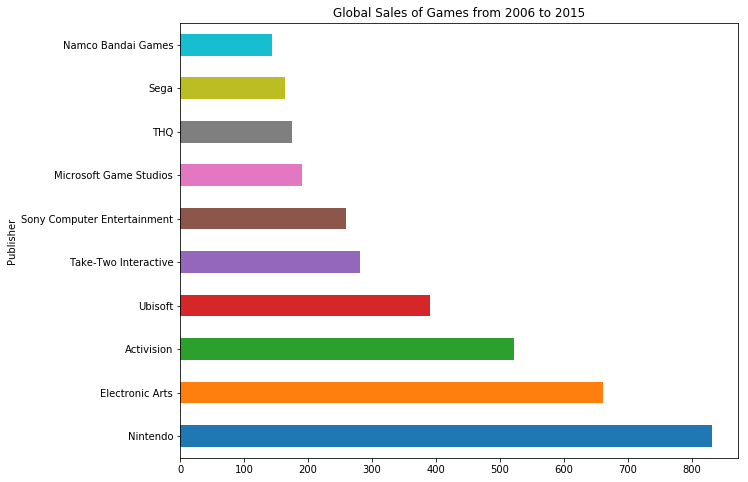

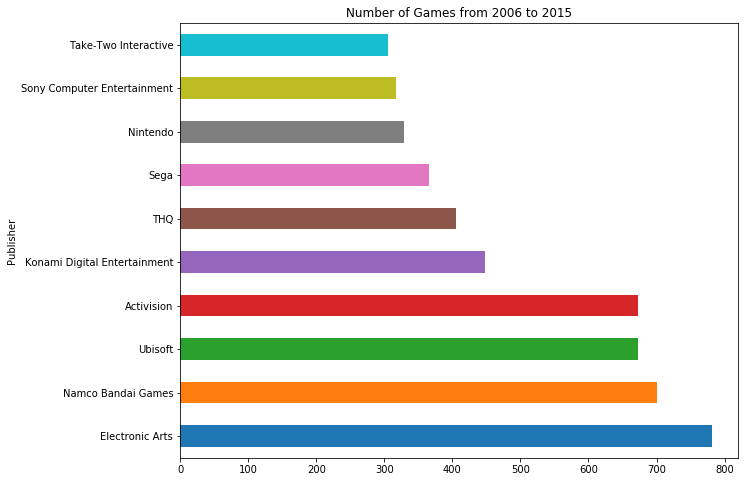

In [52]:
#preview the top 10 Global Sales and number of Publisher from 2006 to 2015
Publisher_06_15 = sales06_15.groupby('Publisher').sum()
del Publisher_06_15['Year']
Publisher_sales_06_15 = Publisher_06_15.sort_values(by='Global_Sales', ascending=False).head(10)
pd.Series(Publisher_sales_06_15['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of Games from 2006 to 2015') 
plt.show()
Publisher_games_06_15 = Publisher_06_15.sort_values(by='Number of Games', ascending=False).head(10)
pd.Series(Publisher_games_06_15['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games from 2006 to 2015') 
plt.show()

In [53]:
#create data frame of genre: Shooter for top 4 Publisher 
#Nintendo, Activision, Electronic Arts and Ubisoft
Shooter_Nintendo = pd.DataFrame()
for a in list_Shooter:
    i = copy.deepcopy(a)
    i = i.loc[i['Publisher'] == 'Nintendo']
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Shooter_Nintendo = pd.concat([Shooter_Nintendo,i],axis=0)
Shooter_Nintendo = Shooter_Nintendo.loc['sum',:]
Shooter_Nintendo.index = year06_15

In [54]:
Shooter_Activision = pd.DataFrame()
for a in list_Shooter:
    i = copy.deepcopy(a)
    i = i.loc[i['Publisher'] == 'Activision']
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Shooter_Activision = pd.concat([Shooter_Activision,i],axis=0)
Shooter_Activision = Shooter_Activision.loc['sum',:]
Shooter_Activision.index = year06_15

In [55]:
Shooter_ElectronicArts = pd.DataFrame()
for a in list_Shooter:
    i = copy.deepcopy(a)
    i = i.loc[i['Publisher'] == 'Electronic Arts']
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Shooter_ElectronicArts = pd.concat([Shooter_ElectronicArts,i],axis=0)
Shooter_ElectronicArts = Shooter_ElectronicArts.loc['sum',:]
Shooter_ElectronicArts.index = year06_15

In [56]:
Shooter_Ubisoft = pd.DataFrame()
for a in list_Shooter:
    i = copy.deepcopy(a)
    i = i.loc[i['Publisher'] == 'Ubisoft']
    del i['Year'], i['Name'], i['Platform'], i['Genre'], i['Publisher']
    i.loc["sum"] = list(i.apply(lambda x: x.sum()))
    Shooter_Ubisoft = pd.concat([Shooter_Ubisoft,i],axis=0)
Shooter_Ubisoft = Shooter_Ubisoft.loc['sum',:]
Shooter_Ubisoft.index = year06_15

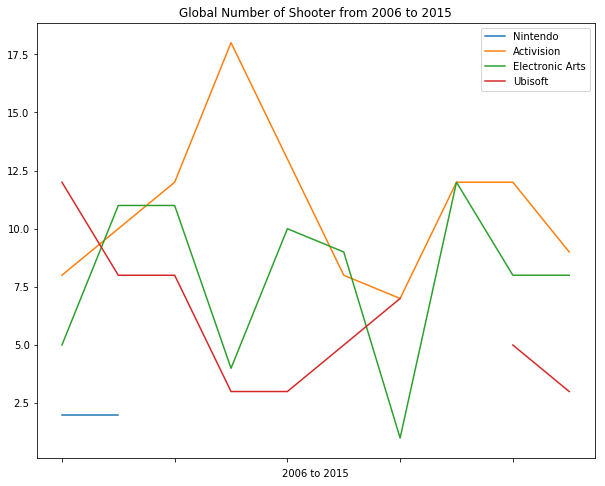

In [57]:
#draw a line chart by Number
Publisher_Number_Shooter= pd.DataFrame({'Nintendo':Shooter_Nintendo.loc[:,'Number of Games'],
 'Activision':Shooter_Activision.loc[:,'Number of Games'],
 'Electronic Arts':Shooter_ElectronicArts.loc[:,'Number of Games'],
 'Ubisoft':Shooter_Ubisoft.loc[:,'Number of Games']})
Publisher_Number_Shooter.plot(kind='line', figsize=(10,8), title='Global Number of Shooter from 2006 to 2015')
plt.xlabel('2006 to 2015')
plt.show()

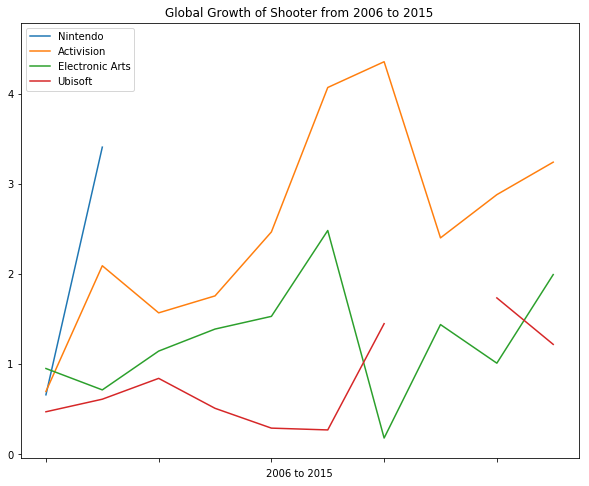

In [58]:
#draw a line chart by Growth
Publisher_Growth_Shooter= pd.DataFrame({'Nintendo':Shooter_Nintendo.loc[:,'Global_Sales']/Shooter_Nintendo.loc[:,'Number of Games'],
 'Activision':Shooter_Activision.loc[:,'Global_Sales']/Shooter_Activision.loc[:,'Number of Games'],
 'Electronic Arts':Shooter_ElectronicArts.loc[:,'Global_Sales']/Shooter_ElectronicArts.loc[:,'Number of Games'],
 'Ubisoft':Shooter_Ubisoft.loc[:,'Global_Sales']/Shooter_Ubisoft.loc[:,'Number of Games']})
Publisher_Growth_Shooter.plot(kind='line', figsize=(10,8), title='Global Growth of Shooter from 2006 to 2015')
plt.xlabel('2006 to 2015')
plt.show()

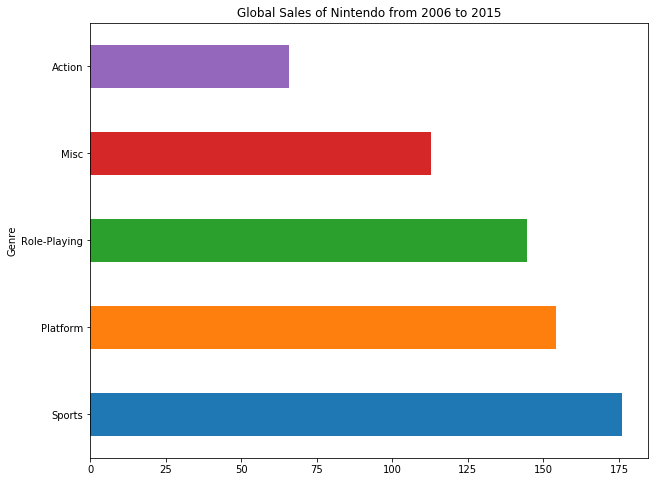

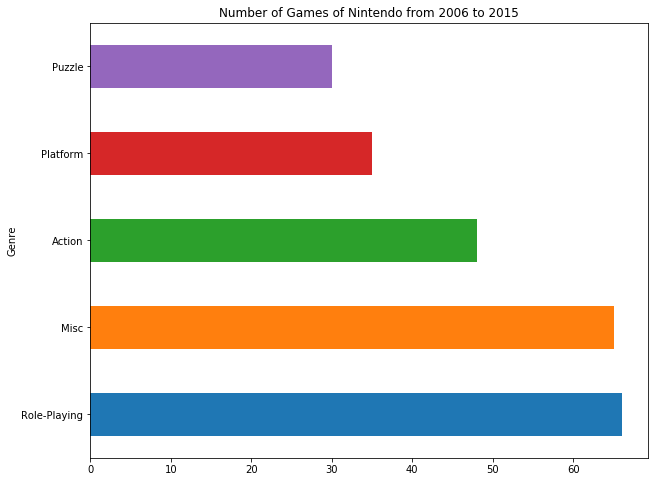

In [59]:
#draw bar chart to see the sales and number of each Publisher  from 2006 to 2015
Nintendo_sales06_15 = sales06_15.loc[sales06_15['Publisher'] == 'Nintendo']
Nintendo_Genre_06_15 = Nintendo_sales06_15.groupby('Genre').sum()
del Nintendo_Genre_06_15['Year']
Nintendo_Genre_sales = Nintendo_Genre_06_15.sort_values(by='Global_Sales', ascending=False).head(5)
pd.Series(Nintendo_Genre_sales['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of Nintendo from 2006 to 2015') 
plt.show()
Nintendo_Genre_games = Nintendo_Genre_06_15.sort_values(by='Number of Games', ascending=False).head(5)
pd.Series(Nintendo_Genre_games['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games of Nintendo from 2006 to 2015') 
plt.show()

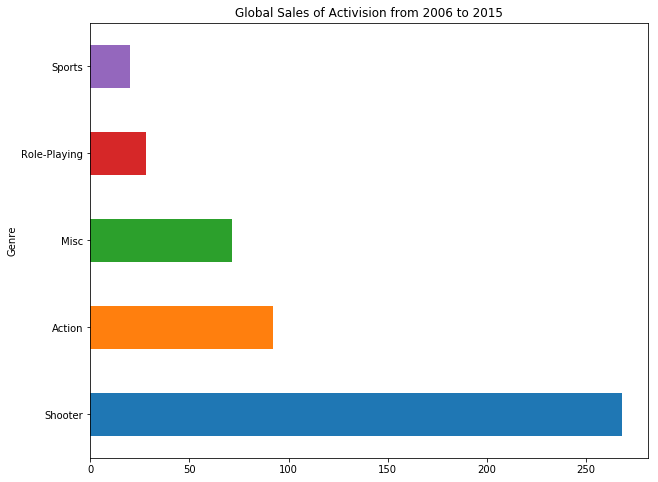

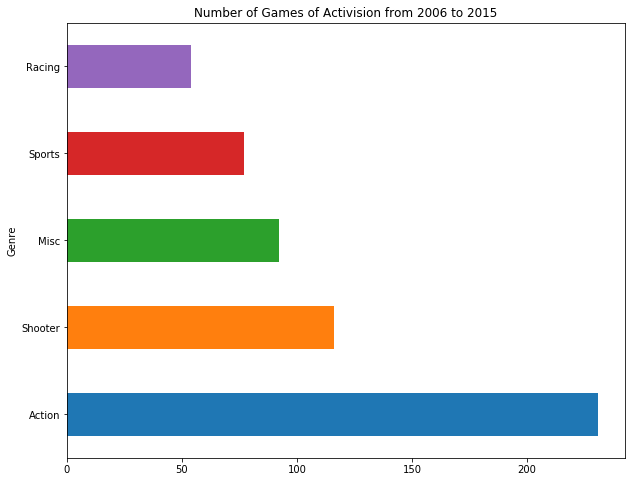

In [60]:
Activision_sales06_15 = sales06_15.loc[sales06_15['Publisher'] == 'Activision']
Activision_Genre_06_15 = Activision_sales06_15.groupby('Genre').sum()
del Activision_Genre_06_15['Year']
Activision_Genre_sales = Activision_Genre_06_15.sort_values(by='Global_Sales', ascending=False).head(5)
pd.Series(Activision_Genre_sales['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of Activision from 2006 to 2015') 
plt.show()
Activision_Genre_games = Activision_Genre_06_15.sort_values(by='Number of Games', ascending=False).head(5)
pd.Series(Activision_Genre_games['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games of Activision from 2006 to 2015') 
plt.show()

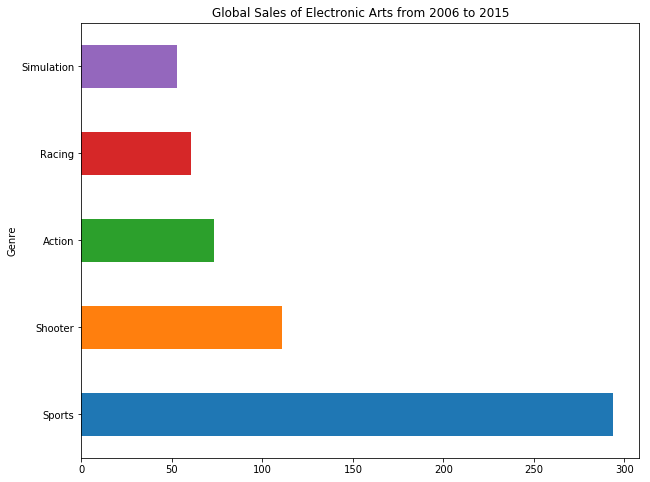

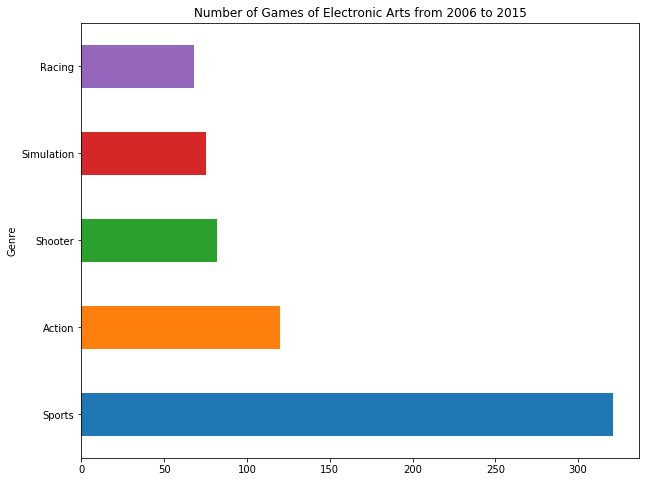

In [61]:
ElectronicArts_sales06_15 = sales06_15.loc[sales06_15['Publisher'] == 'Electronic Arts']
ElectronicArts_Genre_06_15 = ElectronicArts_sales06_15.groupby('Genre').sum()
del ElectronicArts_Genre_06_15['Year']
ElectronicArts_Genre_sales = ElectronicArts_Genre_06_15.sort_values(by='Global_Sales', ascending=False).head(5)
pd.Series(ElectronicArts_Genre_sales['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of Electronic Arts from 2006 to 2015') 
plt.show()
ElectronicArts_Genre_games = ElectronicArts_Genre_06_15.sort_values(by='Number of Games', ascending=False).head(5)
pd.Series(ElectronicArts_Genre_games['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games of Electronic Arts from 2006 to 2015') 
plt.show()

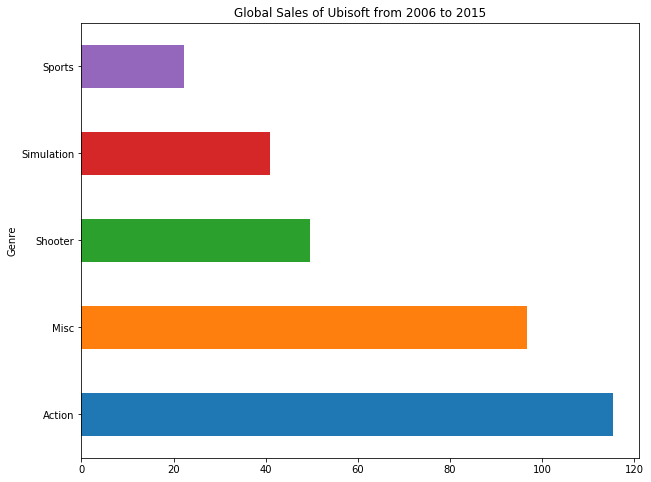

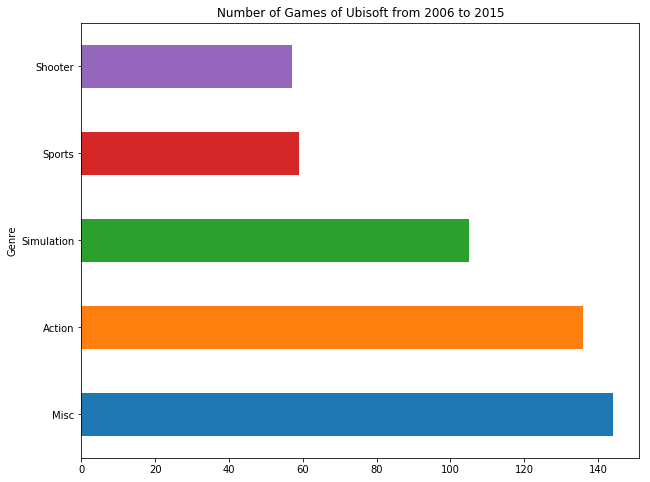

In [62]:
Ubisoft_sales06_15 = sales06_15.loc[sales06_15['Publisher'] == 'Ubisoft']
Ubisoft_Genre_06_15 = Ubisoft_sales06_15.groupby('Genre').sum()
del Ubisoft_Genre_06_15['Year']
Ubisoft_Genre_sales = Ubisoft_Genre_06_15.sort_values(by='Global_Sales', ascending=False).head(5)
pd.Series(Ubisoft_Genre_sales['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of Ubisoft from 2006 to 2015') 
plt.show()
Ubisoft_Genre_games = Ubisoft_Genre_06_15.sort_values(by='Number of Games', ascending=False).head(5)
pd.Series(Ubisoft_Genre_games['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games of Ubisoft from 2006 to 2015') 
plt.show()

In [63]:
#create data frame for top 4 Publisher
Nintendo = pd.DataFrame()
for i in list_year:
    df = copy.deepcopy(i)
    df = df.loc[df['Publisher'] == 'Nintendo']
    del df['Year'], df['Name'], df['Platform'], df['Genre'], df['Publisher']
    df.loc["sum"] = list(df.apply(lambda x: x.sum()))
    Nintendo = pd.concat([Nintendo,df],axis=0)
Nintendo = Nintendo.loc['sum',:]
Nintendo.index = year06_15

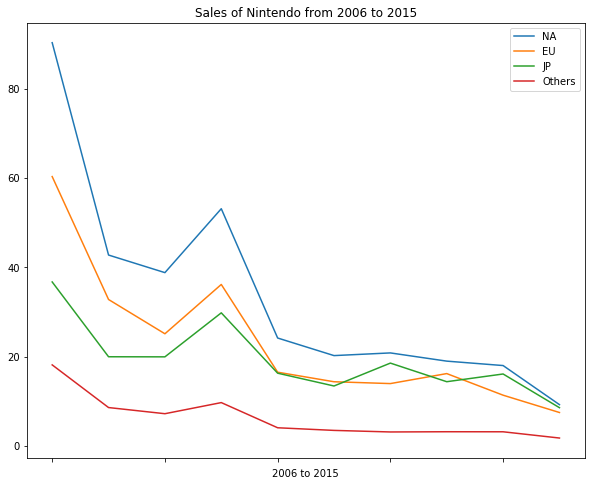

In [64]:
#draw line chart to see the sales and number by each area
Nintendo_sales = pd.DataFrame({'NA':Nintendo.loc[:,'NA_Sales'],
 'EU':Nintendo.loc[:,'EU_Sales'],
 'JP':Nintendo.loc[:,'JP_Sales'],
 'Others':Nintendo.loc[:,'Other_Sales']})
Nintendo_sales.plot(kind='line', figsize=(10,8), title='Sales of Nintendo from 2006 to 2015')
plt.xlabel('2006 to 2015')
plt.show()

In [65]:
Ubisoft = pd.DataFrame()
for i in list_year:
    df = copy.deepcopy(i)
    df = df.loc[df['Publisher'] == 'Ubisoft']
    del df['Year'], df['Name'], df['Platform'], df['Genre'], df['Publisher']
    df.loc["sum"] = list(df.apply(lambda x: x.sum()))
    Ubisoft = pd.concat([Ubisoft,df],axis=0)
Ubisoft = Ubisoft.loc['sum',:]
Ubisoft.index = year06_15

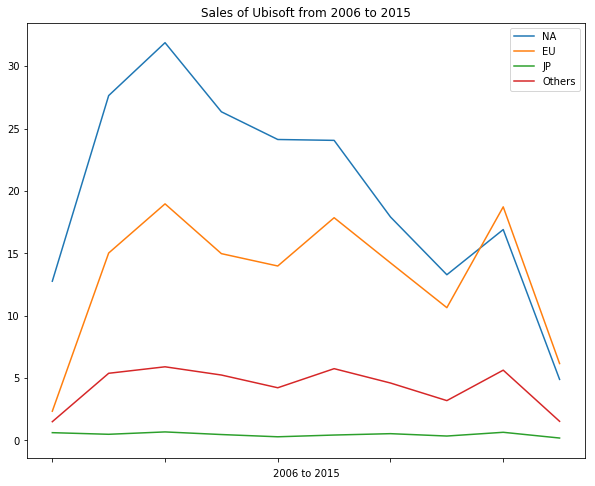

In [66]:
Ubisoft_sales = pd.DataFrame({'NA':Ubisoft.loc[:,'NA_Sales'],
 'EU':Ubisoft.loc[:,'EU_Sales'],
 'JP':Ubisoft.loc[:,'JP_Sales'],
 'Others':Ubisoft.loc[:,'Other_Sales']})
Ubisoft_sales.plot(kind='line', figsize=(10,8), title='Sales of Ubisoft from 2006 to 2015')
plt.xlabel('2006 to 2015')
plt.show()

In [67]:
ElectronicArts = pd.DataFrame()
for i in list_year:
    df = copy.deepcopy(i)
    df = df.loc[df['Publisher'] == 'Electronic Arts']
    del df['Year'], df['Name'], df['Platform'], df['Genre'], df['Publisher']
    df.loc["sum"] = list(df.apply(lambda x: x.sum()))
    ElectronicArts = pd.concat([ElectronicArts,df],axis=0)
ElectronicArts = ElectronicArts.loc['sum',:]
ElectronicArts.index = year06_15

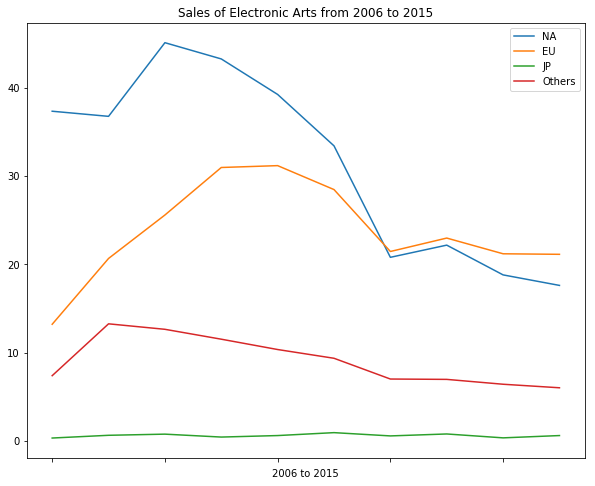

In [68]:
ElectronicArts_sales = pd.DataFrame({'NA':ElectronicArts.loc[:,'NA_Sales'],
 'EU':ElectronicArts.loc[:,'EU_Sales'],
 'JP':ElectronicArts.loc[:,'JP_Sales'],
 'Others':ElectronicArts.loc[:,'Other_Sales']})
ElectronicArts_sales.plot(kind='line', figsize=(10,8), title='Sales of Electronic Arts from 2006 to 2015')
plt.xlabel('2006 to 2015')
plt.show()

In [69]:
Activision = pd.DataFrame()
for i in list_year:
    df = copy.deepcopy(i)
    df = df.loc[df['Publisher'] == 'Activision']
    del df['Year'], df['Name'], df['Platform'], df['Genre'], df['Publisher']
    df.loc["sum"] = list(df.apply(lambda x: x.sum()))
    Activision = pd.concat([Activision,df],axis=0)
Activision = Activision.loc['sum',:]
Activision.index = year06_15

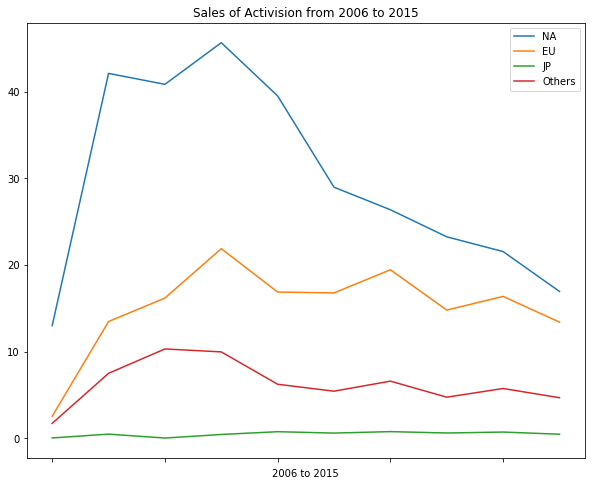

In [70]:
Activision_sales = pd.DataFrame({'NA':Activision.loc[:,'NA_Sales'],
 'EU':Activision.loc[:,'EU_Sales'],
 'JP':Activision.loc[:,'JP_Sales'],
 'Others':Activision.loc[:,'Other_Sales']})
Activision_sales.plot(kind='line', figsize=(10,8), title='Sales of Activision from 2006 to 2015')
plt.xlabel('2006 to 2015')
plt.show()

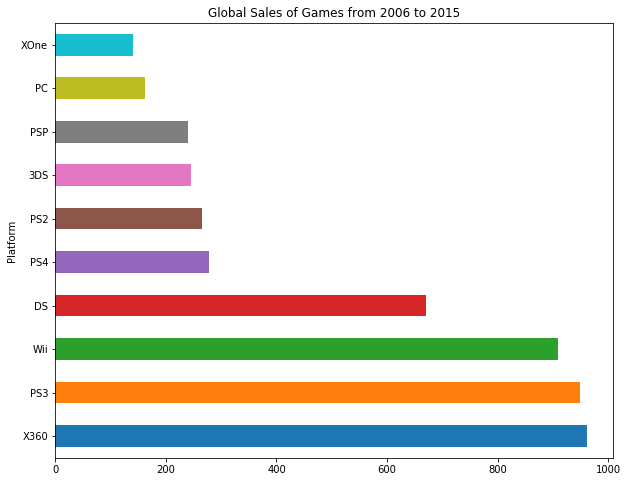

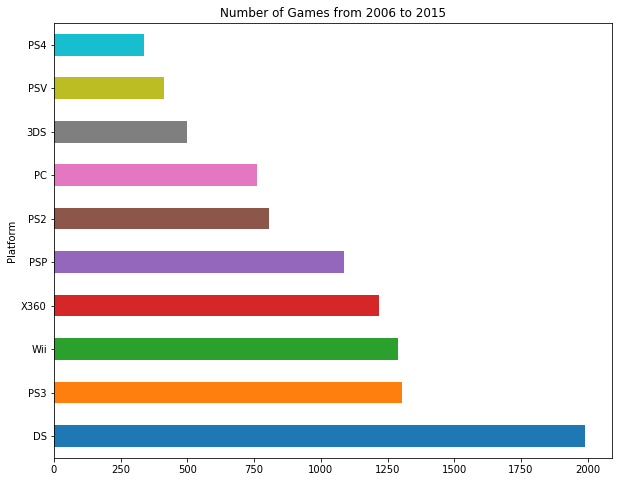

In [71]:
#group by Platform to find the favorite platform from 2006 to 2015
Platform_06_15 = sales06_15.groupby('Platform').sum()
del Platform_06_15['Year']
Platform_sales_06_15 = Platform_06_15.sort_values(by='Global_Sales', ascending=False).head(10)
pd.Series(Platform_sales_06_15['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of Games from 2006 to 2015') 
plt.show()
Platform_games_06_15 = Platform_06_15.sort_values(by='Number of Games', ascending=False).head(10)
pd.Series(Platform_games_06_15['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games from 2006 to 2015') 
plt.show()

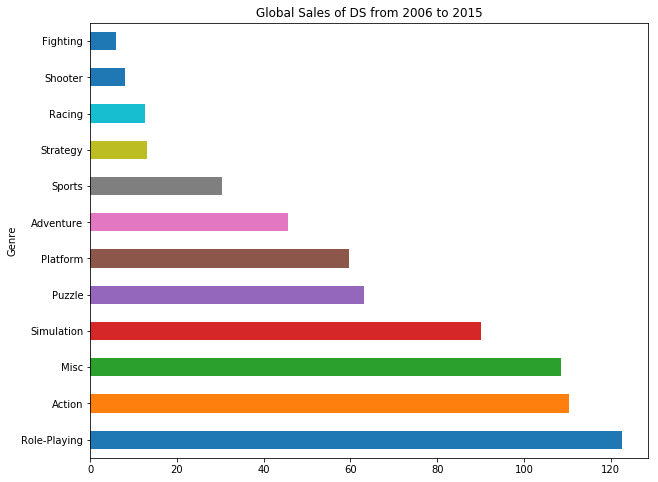

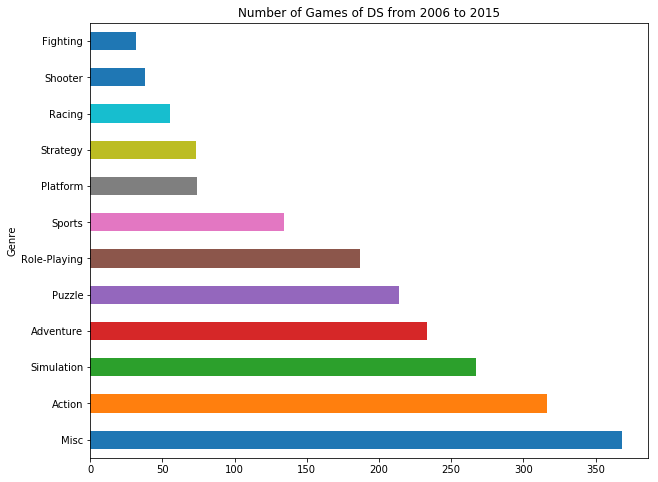

In [72]:
#create data frame for top 4 Platform
DS_sales06_15 = sales06_15.loc[sales06_15['Platform'] == 'DS']
DS_Genre_06_15 = DS_sales06_15.groupby('Genre').sum()
del DS_Genre_06_15['Year']
#draw bar chart to see the sales and number of Genre from each Platform
DS_Genre_sales = DS_Genre_06_15.sort_values(by='Global_Sales', ascending=False)
pd.Series(DS_Genre_sales['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of DS from 2006 to 2015') 
plt.show()
DS_Genre_games = DS_Genre_06_15.sort_values(by='Number of Games', ascending=False)
pd.Series(DS_Genre_games['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games of DS from 2006 to 2015') 
plt.show()

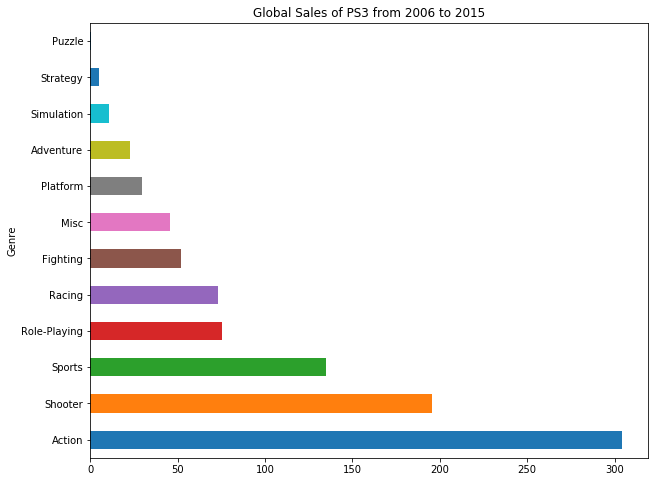

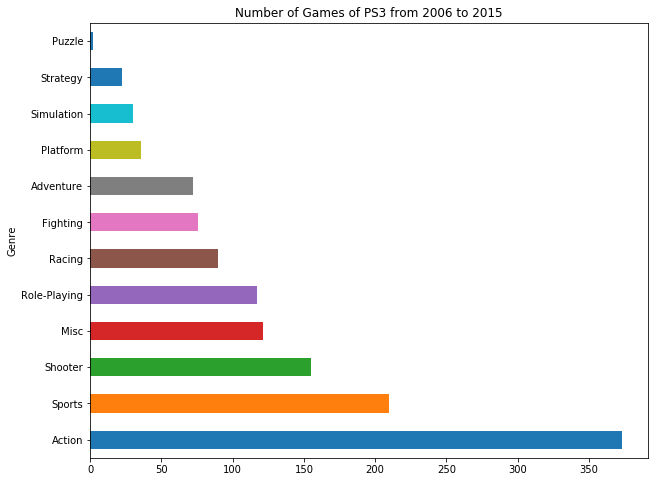

In [73]:
PS3_sales06_15 = sales06_15.loc[sales06_15['Platform'] == 'PS3']
PS3_Genre_06_15 = PS3_sales06_15.groupby('Genre').sum()
del PS3_Genre_06_15['Year']
PS3_Genre_sales = PS3_Genre_06_15.sort_values(by='Global_Sales', ascending=False)
pd.Series(PS3_Genre_sales['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of PS3 from 2006 to 2015') 
plt.show()
PS3_Genre_games = PS3_Genre_06_15.sort_values(by='Number of Games', ascending=False)
pd.Series(PS3_Genre_games['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games of PS3 from 2006 to 2015') 
plt.show()

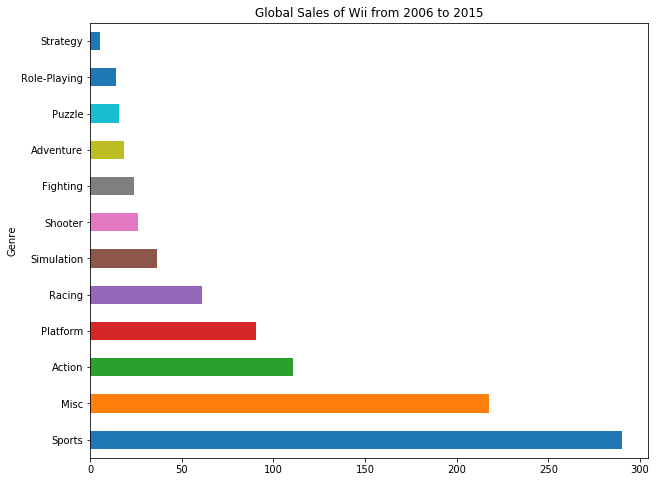

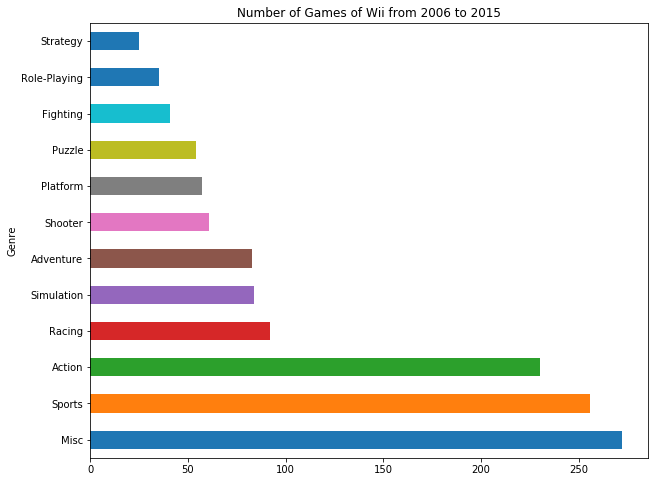

In [74]:
Wii_sales06_15 = sales06_15.loc[sales06_15['Platform'] == 'Wii']
Wii_Genre_06_15 = Wii_sales06_15.groupby('Genre').sum()
del Wii_Genre_06_15['Year']
Wii_Genre_sales = Wii_Genre_06_15.sort_values(by='Global_Sales', ascending=False)
pd.Series(Wii_Genre_sales['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of Wii from 2006 to 2015') 
plt.show()
Wii_Genre_games = Wii_Genre_06_15.sort_values(by='Number of Games', ascending=False)
pd.Series(Wii_Genre_games['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games of Wii from 2006 to 2015') 
plt.show()

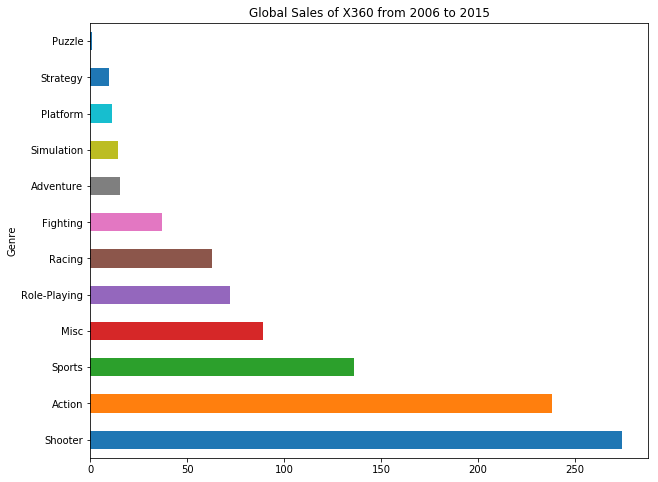

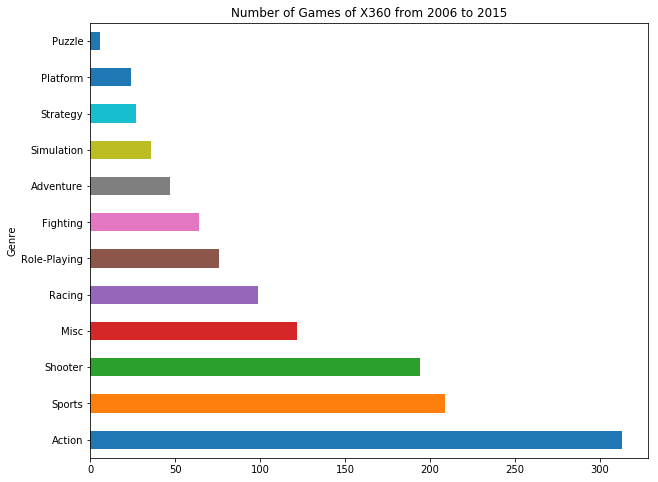

In [75]:
X360_sales06_15 = sales06_15.loc[sales06_15['Platform'] == 'X360']
X360_Genre_06_15 = X360_sales06_15.groupby('Genre').sum()
del X360_Genre_06_15['Year']
X360_Genre_sales = X360_Genre_06_15.sort_values(by='Global_Sales', ascending=False)
pd.Series(X360_Genre_sales['Global_Sales']).plot(kind='barh', figsize=(10,8), title='Global Sales of X360 from 2006 to 2015') 
plt.show()
X360_Genre_games = X360_Genre_06_15.sort_values(by='Number of Games', ascending=False)
pd.Series(X360_Genre_games['Number of Games']).plot(kind='barh', figsize=(10,8), title='Number of Games of X360 from 2006 to 2015') 
plt.show()